In [8]:
import json

# 读取数据
with open('./hw4_data.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 假设数据格式
nodes = data['nodes']  # 用户节点数据
edges = data['edges']  # 边关系数据

# 构建社交网络的邻接列表
social_network = {}

# 初始化邻接列表
for user in nodes:
    user_name = user[0]
    social_network[user_name] = []

# 添加边关系
for edge in edges:
    user1 = edge[0]
    user2 = edge[1]
    # 只需添加一次，因为是无向图
    social_network[user1].append(user2)
    social_network[user2].append(user1)

# 找出每个用户的直接朋友
direct_friends = {user: friends for user, friends in social_network.items()}

# 输出结果
for user, friends in direct_friends.items():
    print(f"{user}'s direct friends: {friends}")

Yanyan-Wang's direct friends: ['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca's direct friends: ['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu's direct friends: ['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998's direct friends: ['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-

In [9]:
# 计算每个用户的度数
degree_count = {user: len(friends) for user, friends in social_network.items()}

# a. 找出度数最多的前5个用户
top_5_degree_users = sorted(degree_count.items(), key=lambda x: x[1], reverse=True)[:5]

# b. 找出影响力最高的前5个用户
influence_scores = {user[0]: user[1] for user in nodes}  # 用户名与影响力分数映射
top_5_influence_users = sorted(influence_scores.items(), key=lambda x: x[1], reverse=True)[:5]

# c. 综合考虑影响力分数和朋友数量
weighted_influence = {}
for user in social_network.keys():
    degree = degree_count[user]
    influence_score = influence_scores.get(user, 0)
    weighted_score = 0.5 * degree + 0.5 * influence_score
    weighted_influence[user] = weighted_score

top_5_influence_combined = sorted(weighted_influence.items(), key=lambda x: x[1], reverse=True)[:5]

# 输出结果
print("Degree Centerity - Top 5 Users:")
for user, degree in top_5_degree_users:
    print(f"{user}: {degree} friends")

print("\nTop 5 Users by Influence Score:")
for user, score in top_5_influence_users:
    print(f"{user}: {score}")

print("\nTop 5 Most Influential Users (Weighted):")
for user, score in top_5_influence_combined:
    print(f"{user}: {score}")

Degree Centerity - Top 5 Users:
tyn1998: 30 friends
frank-zsy: 30 friends
pomelo-nwu: 24 friends
andyhuang18: 23 friends
wj23027: 23 friends

Top 5 Users by Influence Score:
Yanyan-Wang: 50.95
Aarebecca: 23.82
pomelo-nwu: 22.36
tyn1998: 16.64
frank-zsy: 15.8

Top 5 Most Influential Users (Weighted):
Yanyan-Wang: 32.475
tyn1998: 23.32
pomelo-nwu: 23.18
frank-zsy: 22.9
Aarebecca: 17.41


In [10]:
from collections import defaultdict

# 获取 Yanyan-Wang 的朋友
user = "Yanyan-Wang"
friends_of_user = social_network[user]

# a. 找出朋友的朋友并统计共同朋友数量
friends_of_friends = defaultdict(int)

for friend in friends_of_user:
    for friend_of_friend in social_network[friend]:
        if friend_of_friend != user and friend_of_friend not in friends_of_user:
            friends_of_friends[friend_of_friend] += 1

# 根据共同朋友数量排序
recommended_friends = sorted(friends_of_friends.items(), key=lambda x: x[1], reverse=True)

# 输出推荐的朋友及理由
print("Recommended Friends for Yanyan-Wang (based on mutual friends):")
for friend, common_count in recommended_friends:
    print(f"{friend}: {common_count} common friends")

# b. 考虑连接强度找出与 Yanyan-Wang 连接强度最高的5个用户
connection_strength = {}

for edge in edges:
    user1, user2, strength = edge
    if user1 == user:
        connection_strength[user2] = strength
    elif user2 == user:
        connection_strength[user1] = strength

# 排序并提取连接强度最高的5个用户
top_5_connection_strength = sorted(connection_strength.items(), key=lambda x: x[1], reverse=True)[:5]

# 输出推荐的用户及连接强度
print("\nTop 5 Users with Highest Connection Strength to Yanyan-Wang:")
for friend, strength in top_5_connection_strength:
    print(f"{friend}: {strength}")

Recommended Friends for Yanyan-Wang (based on mutual friends):
will-ww: 6 common friends
zhicheng-ning: 6 common friends
PureNatural: 6 common friends
xiaoya-yaya: 6 common friends
xgdyp: 6 common friends
longyanz: 6 common friends
Zzzzzhuzhiwei: 6 common friends
birdflyi: 6 common friends
lhbvvvvv: 6 common friends
zhaosj975: 6 common friends
stevending1st: 5 common friends
wxharry: 4 common friends
pranavshuklaa: 4 common friends
stealth-bombeer: 4 common friends
Vlad116: 4 common friends
kunal8411: 4 common friends

Top 5 Users with Highest Connection Strength to Yanyan-Wang:
Aarebecca: 25.3
pomelo-nwu: 25.09
yangzy0603: 11.85
tyn1998: 9.62
yvonneyx: 7.39


C:\Users\y5344\AppData\Local\Temp\ipykernel_9112\607263849.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Influence Score')


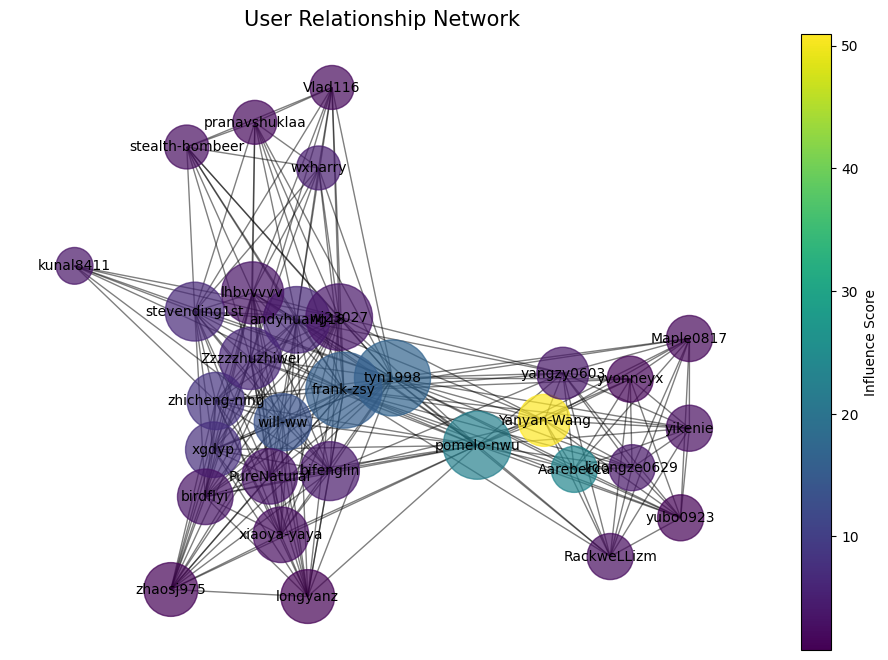

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# 构建图
G = nx.Graph()

# 添加节点和边
for user in nodes:
    G.add_node(user[0], influence=user[1])  # 添加节点，设置影响力得分

for edge in edges:
    G.add_edge(edge[0], edge[1], weight=edge[2])  # 添加边，设置连接强度

# 计算度数
degree_dict = dict(G.degree())
nx.set_node_attributes(G, degree_dict, 'degree')

# 准备绘图参数
node_sizes = [degree_dict[node] * 100 for node in G.nodes()]  # 节点大小
node_colors = [G.nodes[node]['influence'] for node in G.nodes()]  # 节点颜色

# 绘制图形
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # 节点位置

# 绘制节点和边
nx.draw_networkx_edges(G, pos, alpha=0.5)
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.7)

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
sm.set_array([])
plt.colorbar(sm, label='Influence Score')

# 添加标签
nx.draw_networkx_labels(G, pos, font_size=10)

# 设置标题
plt.title("User Relationship Network", fontsize=15)
plt.axis('off')  # 关闭坐标轴
plt.show()